Explore a API do Keras e aprenda como utilizar os recursos explicados aqui: funções de ativação, inicialização de pesos, normalização por lote e dropout. Aplique em alguns modelos MLP para os conjuntos MNIST e Fashion MNIST. Não fique preso ao que foi mencionado na aula: pesquise sobre e utilize outras funções de ativação, inicializações, etc. O objetivo é que você ganhe familiaridade com a biblioteca e autonomia para navegar na API e implementar os recursos em seus modelos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

from random import choices

# Fashion MNIST

## Importando Dataset

In [2]:
fashion_PATH = '/kaggle/input/fashionmnist/'

fashion_train = pd.read_csv(fashion_PATH+'fashion-mnist_train.csv')

In [3]:
X, y = fashion_train.iloc[:,1:].values/255, fashion_train.iloc[:,0].values

In [4]:
label = {
0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'
}

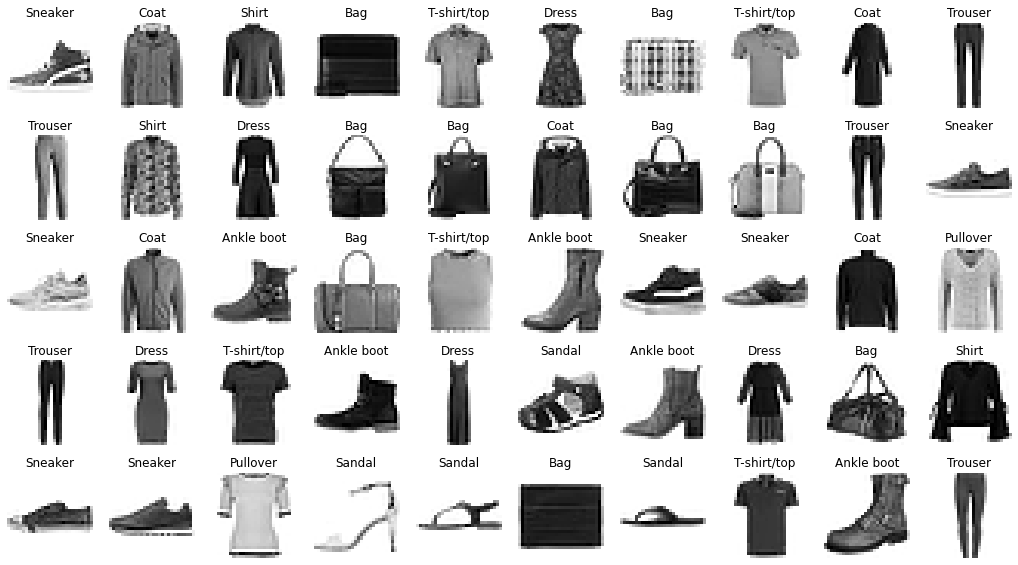

In [5]:
N_images = 50

# localização dos exemplos na matriz de dados 
rows = choices(range(0, 60000), k=N_images)

# selecionando os dígitos, já no formato de matriz
digitos = [X[i].reshape(28,28) for i in rows]
label_value = y[rows]

# criando figura do matplotlib
fig, ax = plt.subplots(5, int(len(rows)/5),figsize=(18,10))

# plotando!
for i in range(len(rows)):
    j = int(i/10)
    k = i - j*10
    ax[j, k].imshow(digitos[i], cmap = plt.cm.binary, interpolation="nearest")
    ax[j, k].set_title(label[label_value[i]])
    ax[j, k].axis('off')

### Funcões Auxiliares

In [6]:
def compare_confusion_matriz(modelo, X_treino, X_validacao, y_treino, y_validacao):
    
    y_validacao_pred = modelo.predict(X_validacao)
    y_train_pred = modelo.predict(X_treino)
    
    if isinstance(m, keras.models.Sequential):
        y_validacao_pred = np.argmax(y_validacao_pred, axis=1)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    
    confusao_val = confusion_matrix(y_validacao, y_validacao_pred)
    confusao_tr = confusion_matrix(y_treino, y_train_pred)
    
    fig, ax = plt.subplots(1, 2,figsize=(20,10))
    sns.heatmap(pd.DataFrame(confusao_val).rename(label, axis=1).rename(label, axis=0), ax=ax[0], cbar=False, annot=True)
    ax[0].set_title('Matriz de confusão validação', size=20)
    ax[0].set_yticklabels(ax[0].get_xticklabels(), rotation=0, size=15)
    ax[0].set_xticklabels(ax[0].get_yticklabels(), rotation=90, size=15)
    sns.heatmap(pd.DataFrame(confusao_tr), ax=ax[1], cbar=False, annot=True)
    ax[1].set_title('Matriz de confusão treino', size=20)
    ax[1].set_yticklabels(ax[1].get_xticklabels(), rotation=0, size=15)
    ax[1].set_xticklabels(ax[1].get_yticklabels(), rotation=0, size=15)
    plt.show()

In [7]:
def acuracia(modelo, X_treino, X_validacao, y_treino, y_validacao):

    y_validacao_pred = modelo.predict(X_validacao)
    y_train_pred = modelo.predict(X_treino)
    
    if isinstance(m, keras.models.Sequential):
        y_validacao_pred = np.argmax(y_validacao_pred, axis=1)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    
    acc_tr = accuracy_score(y_treino, y_train_pred)
    acc_val = accuracy_score(y_validacao, y_validacao_pred)

    return {'Acurácia do treino': acc_tr, 'Acurácia da validação': acc_val}

In [8]:
def plot_erros(model, X, target):

    y_pred = model.predict(X)
    y_pred = np.argmax(y_pred, axis=1)
    
    predicao = pd.DataFrame(data={'predicao':y_pred, 'target':target})
    predicao_erros = predicao[predicao.predicao != predicao.target]
    
    N_images = 50

    # localização dos exemplos na matriz de dados 
    rows = predicao_erros.index[:N_images]

    # selecionando os dígitos, já no formato de matriz
    digitos = [X[i].reshape(28,28) for i in rows]
    label_value = predicao.loc[rows, 'target']
    label_errors = predicao.loc[rows, 'predicao']

    # criando figura do matplotlib
    fig, ax = plt.subplots(5, int(len(rows)/5),figsize=(30,10))

    # plotando!
    for i in range(len(rows)):
        j = int(i/10)
        k = i - j*10
        ax[j, k].imshow(digitos[i], cmap = plt.cm.binary, interpolation="nearest")
        ax[j, k].set_title(f'{label[label_value.iloc[i]]} confused {label[label_errors.iloc[i]]}')
        ax[j, k].axis('off')

## Keras

In [9]:
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
m = keras.models.Sequential()

m.add(keras.layers.Dense(200, input_shape = (784,), activation="relu"))
m.add(keras.layers.Dense(10, activation="softmax"))

m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
%%time 

H = m.fit(X_treino, y_treino, 
          batch_size = 200, epochs = 10, 
          validation_data = (X_validacao, y_validacao));

Epoch 1/10
240/240 [==============================] - 1s 4ms/step - loss: 0.6041 - accuracy: 0.7916 - val_loss: 0.4536 - val_accuracy: 0.8429
Epoch 2/10
240/240 [==============================] - 1s 4ms/step - loss: 0.4296 - accuracy: 0.8486 - val_loss: 0.4168 - val_accuracy: 0.8514
Epoch 3/10
240/240 [==============================] - 1s 4ms/step - loss: 0.3854 - accuracy: 0.8640 - val_loss: 0.3780 - val_accuracy: 0.8642
Epoch 4/10
240/240 [==============================] - 1s 4ms/step - loss: 0.3583 - accuracy: 0.8720 - val_loss: 0.3629 - val_accuracy: 0.8708
Epoch 5/10
240/240 [==============================] - 1s 4ms/step - loss: 0.3373 - accuracy: 0.8796 - val_loss: 0.3492 - val_accuracy: 0.8740
Epoch 6/10
240/240 [==============================] - 1s 4ms/step - loss: 0.3235 - accuracy: 0.8839 - val_loss: 0.3470 - val_accuracy: 0.8758
Epoch 7/10
240/240 [==============================] - 1s 4ms/step - loss: 0.3054 - accuracy: 0.8892 - val_loss: 0.3362 - val_accuracy: 0.8786
Epoch 

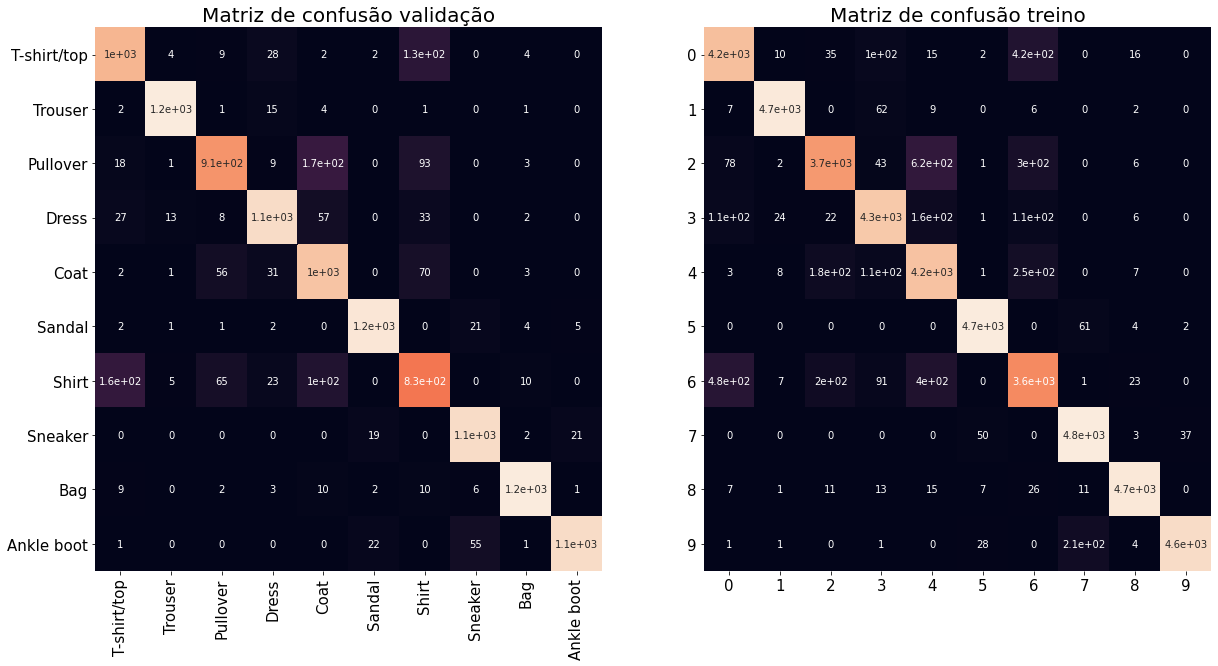

In [12]:
compare_confusion_matriz(m, X_treino, X_validacao, y_treino, y_validacao)

In [13]:
acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

{'Acurácia do treino': 0.9076666666666666,
 'Acurácia da validação': 0.8863333333333333}

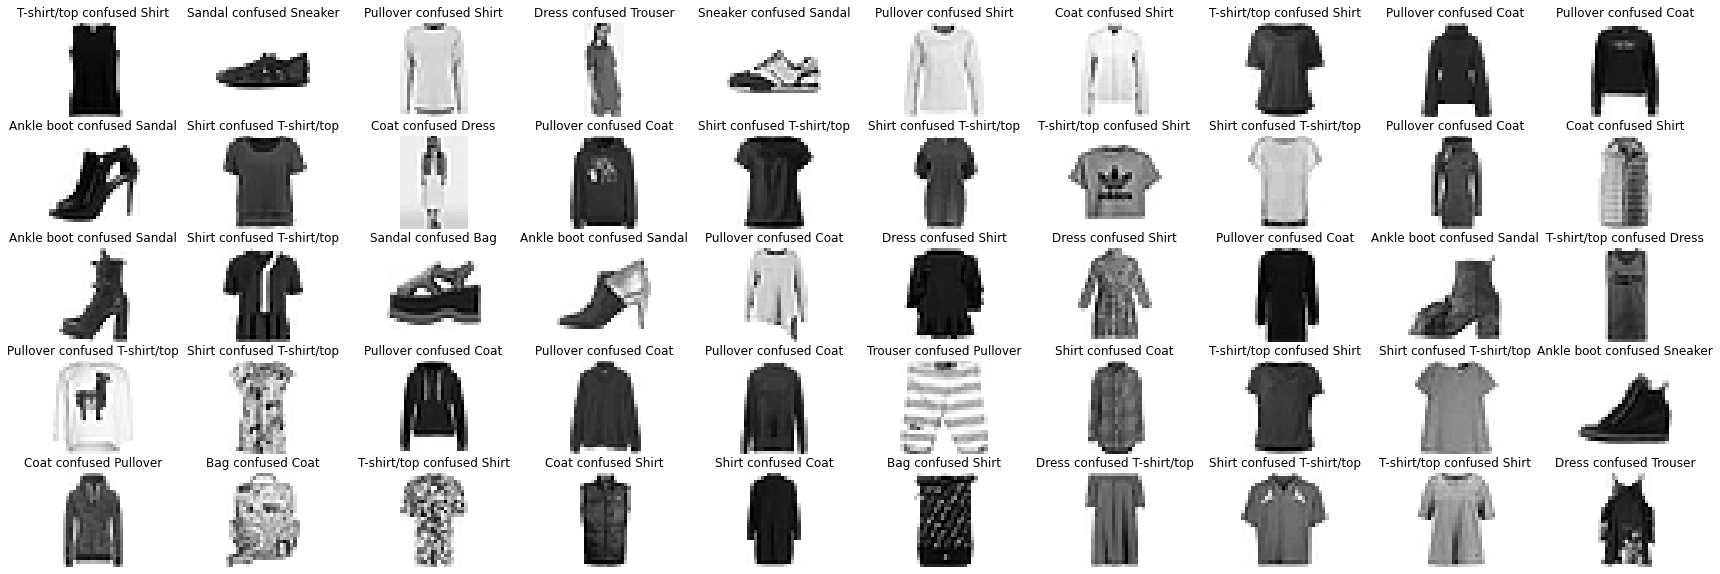

In [14]:
plot_erros(m, X_validacao, y_validacao)

Existem muitas confusões perfeitamente aceitáveis como Senaker com Sandal, T-shirt com shirt. Porem tem alguns erros mais sérios como bag com shirt, bag com coat o programa tem uma dificuldade particular em classificar shirt.

## Otimização do modelo

### Número de neurônios na camada oculta

In [15]:
%%time 

neurons_list = [10, 20, 40, 100, 150, 200, 300, 400, 600, 1000]
acuracia_dict = dict()

for value in neurons_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(value, input_shape = (784,), activation="relu"))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 200, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[value] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
240/240 [==============================] - 1s 3ms/step - loss: 0.9650 - accuracy: 0.6943 - val_loss: 0.6358 - val_accuracy: 0.7896
Epoch 2/20
240/240 [==============================] - 1s 2ms/step - loss: 0.5778 - accuracy: 0.8087 - val_loss: 0.5425 - val_accuracy: 0.8175
Epoch 3/20
240/240 [==============================] - 1s 2ms/step - loss: 0.5143 - accuracy: 0.8269 - val_loss: 0.4965 - val_accuracy: 0.8307
Epoch 4/20
240/240 [==============================] - 1s 2ms/step - loss: 0.4828 - accuracy: 0.8354 - val_loss: 0.4714 - val_accuracy: 0.8367
Epoch 5/20
240/240 [==============================] - 1s 2ms/step - loss: 0.4640 - accuracy: 0.8405 - val_loss: 0.4568 - val_accuracy: 0.8431
Epoch 6/20
240/240 [==============================] - 1s 2ms/step - loss: 0.4509 - accuracy: 0.8452 - val_loss: 0.4464 - val_accuracy: 0.8442
Epoch 7/20
240/240 [==============================] - 1s 2ms/step - loss: 0.4397 - accuracy: 0.8482 - val_loss: 0.4404 - val_accuracy: 0.8472
Epoch 

240/240 [==============================] - 1s 2ms/step - loss: 0.2928 - accuracy: 0.8964 - val_loss: 0.3434 - val_accuracy: 0.8790
Epoch 19/20
240/240 [==============================] - 1s 2ms/step - loss: 0.2895 - accuracy: 0.8980 - val_loss: 0.3423 - val_accuracy: 0.8788
Epoch 20/20
240/240 [==============================] - 1s 2ms/step - loss: 0.2844 - accuracy: 0.8972 - val_loss: 0.3406 - val_accuracy: 0.8776
Epoch 1/20
240/240 [==============================] - 1s 4ms/step - loss: 0.6340 - accuracy: 0.7857 - val_loss: 0.4708 - val_accuracy: 0.8347
Epoch 2/20
240/240 [==============================] - 1s 3ms/step - loss: 0.4361 - accuracy: 0.8491 - val_loss: 0.4175 - val_accuracy: 0.8560
Epoch 3/20
240/240 [==============================] - 1s 3ms/step - loss: 0.3968 - accuracy: 0.8610 - val_loss: 0.3870 - val_accuracy: 0.8672
Epoch 4/20
240/240 [==============================] - 1s 3ms/step - loss: 0.3743 - accuracy: 0.8690 - val_loss: 0.3823 - val_accuracy: 0.8629
Epoch 5/20
240/

240/240 [==============================] - 1s 4ms/step - loss: 0.2350 - accuracy: 0.9135 - val_loss: 0.3174 - val_accuracy: 0.8869
Epoch 16/20
240/240 [==============================] - 1s 4ms/step - loss: 0.2275 - accuracy: 0.9183 - val_loss: 0.3101 - val_accuracy: 0.8877
Epoch 17/20
240/240 [==============================] - 1s 4ms/step - loss: 0.2216 - accuracy: 0.9184 - val_loss: 0.3063 - val_accuracy: 0.8935
Epoch 18/20
240/240 [==============================] - 1s 4ms/step - loss: 0.2137 - accuracy: 0.9230 - val_loss: 0.3122 - val_accuracy: 0.8874
Epoch 19/20
240/240 [==============================] - 1s 4ms/step - loss: 0.2104 - accuracy: 0.9230 - val_loss: 0.3139 - val_accuracy: 0.8898
Epoch 20/20
240/240 [==============================] - 1s 4ms/step - loss: 0.2021 - accuracy: 0.9262 - val_loss: 0.3052 - val_accuracy: 0.8924
Epoch 1/20
240/240 [==============================] - 1s 5ms/step - loss: 0.5766 - accuracy: 0.8005 - val_loss: 0.4461 - val_accuracy: 0.8447
Epoch 2/20
2

240/240 [==============================] - 2s 8ms/step - loss: 0.2254 - accuracy: 0.9166 - val_loss: 0.3027 - val_accuracy: 0.8903
Epoch 13/20
240/240 [==============================] - 2s 7ms/step - loss: 0.2139 - accuracy: 0.9224 - val_loss: 0.3144 - val_accuracy: 0.8893
Epoch 14/20
240/240 [==============================] - 2s 7ms/step - loss: 0.2087 - accuracy: 0.9222 - val_loss: 0.2951 - val_accuracy: 0.8933
Epoch 15/20
240/240 [==============================] - 2s 7ms/step - loss: 0.1991 - accuracy: 0.9274 - val_loss: 0.3009 - val_accuracy: 0.8957
Epoch 16/20
240/240 [==============================] - 2s 7ms/step - loss: 0.1970 - accuracy: 0.9278 - val_loss: 0.3284 - val_accuracy: 0.8856
Epoch 17/20
240/240 [==============================] - 2s 7ms/step - loss: 0.1866 - accuracy: 0.9312 - val_loss: 0.3141 - val_accuracy: 0.8894
Epoch 18/20
240/240 [==============================] - 2s 7ms/step - loss: 0.1772 - accuracy: 0.9348 - val_loss: 0.3167 - val_accuracy: 0.8876
Epoch 19/20

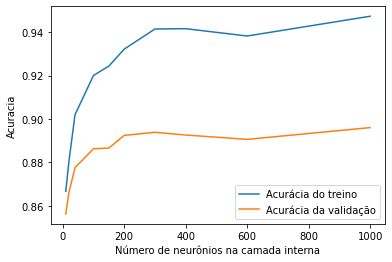

In [16]:
pd.DataFrame(acuracia_dict).T.plot()
plt.xlabel('Número de neurônios na camada interna')
plt.ylabel('Acuracia')
plt.show()

Parece que 400 neurônios apresentam um valor satisfatório (há efeitos na aleatóriedade do programa na predição e certas execuções resultam em uma melhora pequena. É conservado o valor que retorna mais frequentemente bons resultados)

### Adição de mais uma camada de neurônios

In [17]:
%%time 

neurons_list = [10, 20, 40, 100, 200]
acuracia_dict = dict()

for value in neurons_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(400, input_shape = (784,), activation="relu"))
    m.add(keras.layers.Dense(value, input_shape = (400,), activation="relu"))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 200, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[value] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
240/240 [==============================] - 2s 7ms/step - loss: 0.8038 - accuracy: 0.7273 - val_loss: 0.4998 - val_accuracy: 0.8292
Epoch 2/20
240/240 [==============================] - 2s 6ms/step - loss: 0.4594 - accuracy: 0.8422 - val_loss: 0.4345 - val_accuracy: 0.8502
Epoch 3/20
240/240 [==============================] - 2s 6ms/step - loss: 0.4041 - accuracy: 0.8583 - val_loss: 0.3895 - val_accuracy: 0.8649
Epoch 4/20
240/240 [==============================] - 1s 6ms/step - loss: 0.3696 - accuracy: 0.8702 - val_loss: 0.3903 - val_accuracy: 0.8601
Epoch 5/20
240/240 [==============================] - 1s 5ms/step - loss: 0.3462 - accuracy: 0.8774 - val_loss: 0.3567 - val_accuracy: 0.8712
Epoch 6/20
240/240 [==============================] - 1s 6ms/step - loss: 0.3283 - accuracy: 0.8839 - val_loss: 0.3512 - val_accuracy: 0.8734
Epoch 7/20
240/240 [==============================] - 1s 6ms/step - loss: 0.3129 - accuracy: 0.8884 - val_loss: 0.3509 - val_accuracy: 0.8727
Epoch 

240/240 [==============================] - 1s 6ms/step - loss: 0.1842 - accuracy: 0.9312 - val_loss: 0.3132 - val_accuracy: 0.8957
Epoch 19/20
240/240 [==============================] - 1s 6ms/step - loss: 0.1746 - accuracy: 0.9346 - val_loss: 0.3406 - val_accuracy: 0.8907
Epoch 20/20
240/240 [==============================] - 1s 6ms/step - loss: 0.1736 - accuracy: 0.9358 - val_loss: 0.3347 - val_accuracy: 0.8914
Epoch 1/20
240/240 [==============================] - 2s 7ms/step - loss: 0.5671 - accuracy: 0.8011 - val_loss: 0.4302 - val_accuracy: 0.8479
Epoch 2/20
240/240 [==============================] - 2s 7ms/step - loss: 0.3966 - accuracy: 0.8596 - val_loss: 0.3772 - val_accuracy: 0.8656
Epoch 3/20
240/240 [==============================] - 2s 7ms/step - loss: 0.3494 - accuracy: 0.8742 - val_loss: 0.3403 - val_accuracy: 0.8797
Epoch 4/20
240/240 [==============================] - 2s 7ms/step - loss: 0.3251 - accuracy: 0.8826 - val_loss: 0.3956 - val_accuracy: 0.8618
Epoch 5/20
240/

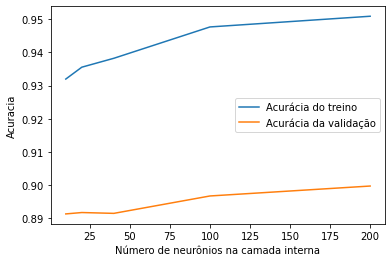

In [18]:
pd.DataFrame(acuracia_dict).T.plot()
plt.xlabel('Número de neurônios na camada interna')
plt.ylabel('Acuracia')
plt.show()

A adição de uma novaca camada não afetou de forma significativa a predição.

### Batch Size

In [19]:
%%time 

batch_size_list = [50, 70, 100, 200, 300, 400]
acuracia_dict = dict()

for value in batch_size_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(400, input_shape = (784,), activation="relu"))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = value, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[value] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
960/960 [==============================] - 3s 3ms/step - loss: 0.5120 - accuracy: 0.8177 - val_loss: 0.4012 - val_accuracy: 0.8572
Epoch 2/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3841 - accuracy: 0.8602 - val_loss: 0.3812 - val_accuracy: 0.8593
Epoch 3/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3426 - accuracy: 0.8768 - val_loss: 0.3587 - val_accuracy: 0.8696
Epoch 4/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3140 - accuracy: 0.8836 - val_loss: 0.3511 - val_accuracy: 0.8758
Epoch 5/20
960/960 [==============================] - 3s 3ms/step - loss: 0.2938 - accuracy: 0.8909 - val_loss: 0.3433 - val_accuracy: 0.8743
Epoch 6/20
960/960 [==============================] - 3s 3ms/step - loss: 0.2799 - accuracy: 0.8961 - val_loss: 0.3117 - val_accuracy: 0.8861
Epoch 7/20
960/960 [==============================] - 3s 3ms/step - loss: 0.2657 - accuracy: 0.9028 - val_loss: 0.3502 - val_accuracy: 0.8720
Epoch 

480/480 [==============================] - 2s 4ms/step - loss: 0.1757 - accuracy: 0.9353 - val_loss: 0.3059 - val_accuracy: 0.8962
Epoch 19/20
480/480 [==============================] - 2s 4ms/step - loss: 0.1699 - accuracy: 0.9361 - val_loss: 0.3221 - val_accuracy: 0.8931
Epoch 20/20
480/480 [==============================] - 2s 4ms/step - loss: 0.1636 - accuracy: 0.9398 - val_loss: 0.3223 - val_accuracy: 0.8918
Epoch 1/20
240/240 [==============================] - 1s 6ms/step - loss: 0.5639 - accuracy: 0.8046 - val_loss: 0.4287 - val_accuracy: 0.8500
Epoch 2/20
240/240 [==============================] - 1s 5ms/step - loss: 0.4095 - accuracy: 0.8567 - val_loss: 0.4047 - val_accuracy: 0.8522
Epoch 3/20
240/240 [==============================] - 1s 5ms/step - loss: 0.3678 - accuracy: 0.8691 - val_loss: 0.3797 - val_accuracy: 0.8659
Epoch 4/20
240/240 [==============================] - 1s 5ms/step - loss: 0.3435 - accuracy: 0.8765 - val_loss: 0.3681 - val_accuracy: 0.8699
Epoch 5/20
240/

120/120 [==============================] - 1s 9ms/step - loss: 0.2356 - accuracy: 0.9156 - val_loss: 0.3069 - val_accuracy: 0.8912
Epoch 16/20
120/120 [==============================] - 1s 9ms/step - loss: 0.2232 - accuracy: 0.9197 - val_loss: 0.2976 - val_accuracy: 0.8927
Epoch 17/20
120/120 [==============================] - 1s 9ms/step - loss: 0.2174 - accuracy: 0.9214 - val_loss: 0.3219 - val_accuracy: 0.8855
Epoch 18/20
120/120 [==============================] - 1s 9ms/step - loss: 0.2144 - accuracy: 0.9220 - val_loss: 0.2986 - val_accuracy: 0.8944
Epoch 19/20
120/120 [==============================] - 1s 9ms/step - loss: 0.2054 - accuracy: 0.9266 - val_loss: 0.3026 - val_accuracy: 0.8932
Epoch 20/20
120/120 [==============================] - 1s 11ms/step - loss: 0.2047 - accuracy: 0.9266 - val_loss: 0.3166 - val_accuracy: 0.8855
CPU times: user 8min 36s, sys: 42.1 s, total: 9min 19s
Wall time: 3min 50s


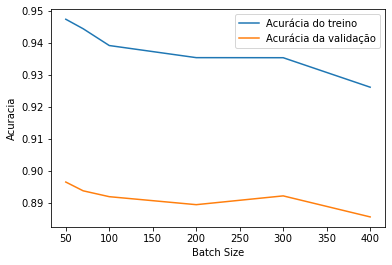

In [20]:
pd.DataFrame(acuracia_dict).T.plot()
plt.xlabel('Batch Size')
plt.ylabel('Acuracia')
plt.show()

Batch size de 300 apresentou um bom resultado e um tempo de execução baixo.

### Funções de ativação

In [21]:
activation_list = ['relu', 'selu', 'tanh', 'sigmoid']
acuracia_dict = dict()

for activation in activation_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(400, input_shape = (784,), activation=activation))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 300, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[activation] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
160/160 [==============================] - 2s 11ms/step - loss: 0.5836 - accuracy: 0.7986 - val_loss: 0.4479 - val_accuracy: 0.8411
Epoch 2/20
160/160 [==============================] - 1s 7ms/step - loss: 0.4200 - accuracy: 0.8533 - val_loss: 0.4145 - val_accuracy: 0.8519
Epoch 3/20
160/160 [==============================] - 1s 7ms/step - loss: 0.3766 - accuracy: 0.8660 - val_loss: 0.3805 - val_accuracy: 0.8646
Epoch 4/20
160/160 [==============================] - 1s 7ms/step - loss: 0.3485 - accuracy: 0.8771 - val_loss: 0.3720 - val_accuracy: 0.8661
Epoch 5/20
160/160 [==============================] - 1s 7ms/step - loss: 0.3267 - accuracy: 0.8837 - val_loss: 0.3391 - val_accuracy: 0.8823
Epoch 6/20
160/160 [==============================] - 1s 7ms/step - loss: 0.3082 - accuracy: 0.8887 - val_loss: 0.3361 - val_accuracy: 0.8768
Epoch 7/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2967 - accuracy: 0.8908 - val_loss: 0.3402 - val_accuracy: 0.8773
Epoch

160/160 [==============================] - 1s 7ms/step - loss: 0.2291 - accuracy: 0.9140 - val_loss: 0.3133 - val_accuracy: 0.8858
Epoch 19/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2208 - accuracy: 0.9199 - val_loss: 0.3053 - val_accuracy: 0.8903
Epoch 20/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2150 - accuracy: 0.9209 - val_loss: 0.3088 - val_accuracy: 0.8876
Epoch 1/20
160/160 [==============================] - 1s 8ms/step - loss: 0.7212 - accuracy: 0.7623 - val_loss: 0.5117 - val_accuracy: 0.8223
Epoch 2/20
160/160 [==============================] - 1s 7ms/step - loss: 0.4821 - accuracy: 0.8302 - val_loss: 0.4518 - val_accuracy: 0.8400
Epoch 3/20
160/160 [==============================] - 1s 7ms/step - loss: 0.4370 - accuracy: 0.8450 - val_loss: 0.4326 - val_accuracy: 0.8460
Epoch 4/20
160/160 [==============================] - 1s 7ms/step - loss: 0.4116 - accuracy: 0.8542 - val_loss: 0.4104 - val_accuracy: 0.8533
Epoch 5/20
160/

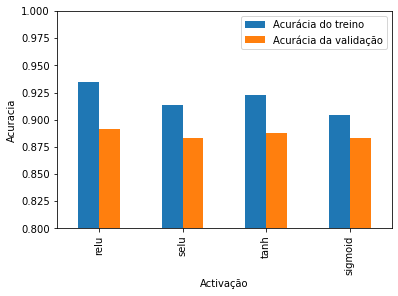

In [22]:
pd.DataFrame(acuracia_dict).T.plot.bar()
plt.xlabel('Activação')
plt.ylabel('Acuracia')
plt.ylim(0.80, 1)
plt.show()

A função de ativação relu apresentou o melhor resultado.

### Optimizer

In [23]:
optimizer_list = ['SGD', 'RMSprop', 'Adam', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
acuracia_dict = dict()

for optimizer in optimizer_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(400, input_shape = (784,), activation='relu'))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 300, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[optimizer] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
160/160 [==============================] - 1s 8ms/step - loss: 1.4151 - accuracy: 0.5866 - val_loss: 1.0089 - val_accuracy: 0.6921
Epoch 2/20
160/160 [==============================] - 1s 7ms/step - loss: 0.8922 - accuracy: 0.7192 - val_loss: 0.8071 - val_accuracy: 0.7414
Epoch 3/20
160/160 [==============================] - 1s 7ms/step - loss: 0.7630 - accuracy: 0.7585 - val_loss: 0.7210 - val_accuracy: 0.7711
Epoch 4/20
160/160 [==============================] - 1s 7ms/step - loss: 0.6963 - accuracy: 0.7799 - val_loss: 0.6699 - val_accuracy: 0.7857
Epoch 5/20
160/160 [==============================] - 1s 7ms/step - loss: 0.6528 - accuracy: 0.7911 - val_loss: 0.6336 - val_accuracy: 0.7977
Epoch 6/20
160/160 [==============================] - 1s 7ms/step - loss: 0.6218 - accuracy: 0.8000 - val_loss: 0.6076 - val_accuracy: 0.8009
Epoch 7/20
160/160 [==============================] - 1s 8ms/step - loss: 0.5977 - accuracy: 0.8065 - val_loss: 0.5866 - val_accuracy: 0.8112
Epoch 

160/160 [==============================] - 1s 7ms/step - loss: 0.1982 - accuracy: 0.9280 - val_loss: 0.2945 - val_accuracy: 0.8967
Epoch 19/20
160/160 [==============================] - 1s 7ms/step - loss: 0.1949 - accuracy: 0.9293 - val_loss: 0.3018 - val_accuracy: 0.8932
Epoch 20/20
160/160 [==============================] - 1s 7ms/step - loss: 0.1867 - accuracy: 0.9318 - val_loss: 0.3041 - val_accuracy: 0.8912
Epoch 1/20
160/160 [==============================] - 1s 8ms/step - loss: 2.3139 - accuracy: 0.1077 - val_loss: 2.2499 - val_accuracy: 0.1187
Epoch 2/20
160/160 [==============================] - 1s 7ms/step - loss: 2.1861 - accuracy: 0.1516 - val_loss: 2.1305 - val_accuracy: 0.1939
Epoch 3/20
160/160 [==============================] - 1s 7ms/step - loss: 2.0726 - accuracy: 0.2528 - val_loss: 2.0218 - val_accuracy: 0.3137
Epoch 4/20
160/160 [==============================] - 1s 7ms/step - loss: 1.9677 - accuracy: 0.3751 - val_loss: 1.9203 - val_accuracy: 0.4223
Epoch 5/20
160/

160/160 [==============================] - 1s 7ms/step - loss: 0.2904 - accuracy: 0.8980 - val_loss: 0.3241 - val_accuracy: 0.8843
Epoch 16/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2825 - accuracy: 0.9005 - val_loss: 0.3247 - val_accuracy: 0.8868
Epoch 17/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2757 - accuracy: 0.9034 - val_loss: 0.3244 - val_accuracy: 0.8872
Epoch 18/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2730 - accuracy: 0.9036 - val_loss: 0.3287 - val_accuracy: 0.8841
Epoch 19/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2675 - accuracy: 0.9043 - val_loss: 0.3137 - val_accuracy: 0.8889
Epoch 20/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2642 - accuracy: 0.9062 - val_loss: 0.3225 - val_accuracy: 0.8845
Epoch 1/20
160/160 [==============================] - 1s 9ms/step - loss: 0.6470 - accuracy: 0.7816 - val_loss: 0.4590 - val_accuracy: 0.8415
Epoch 2/20
1

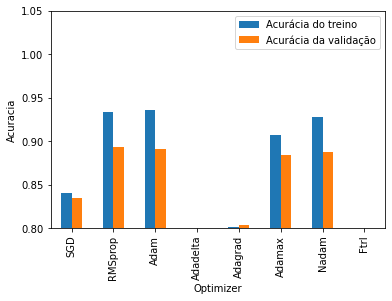

In [24]:
pd.DataFrame(acuracia_dict).T.plot.bar()
plt.xlabel('Optimizer')
plt.ylabel('Acuracia')
plt.ylim(0.80, 1.05)
plt.show()

As otimizações Adamax e Nadam apresentaram o mesmo resultado.

## Dropout

In [32]:
dropout_list = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.8, 0.9]
acuracia_dict = dict()

for dropout in dropout_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(400, input_shape = (784,), activation='relu'))
    m.add(keras.layers.Dropout(dropout))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 300, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[dropout] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
160/160 [==============================] - 2s 10ms/step - loss: 0.6037 - accuracy: 0.7897 - val_loss: 0.4515 - val_accuracy: 0.8422
Epoch 2/20
160/160 [==============================] - 1s 9ms/step - loss: 0.4288 - accuracy: 0.8493 - val_loss: 0.3969 - val_accuracy: 0.8599
Epoch 3/20
160/160 [==============================] - 1s 8ms/step - loss: 0.3798 - accuracy: 0.8648 - val_loss: 0.3881 - val_accuracy: 0.8603
Epoch 4/20
160/160 [==============================] - 1s 8ms/step - loss: 0.3550 - accuracy: 0.8736 - val_loss: 0.3439 - val_accuracy: 0.8773
Epoch 5/20
160/160 [==============================] - 1s 8ms/step - loss: 0.3290 - accuracy: 0.8815 - val_loss: 0.3475 - val_accuracy: 0.8750
Epoch 6/20
160/160 [==============================] - 1s 8ms/step - loss: 0.3138 - accuracy: 0.8875 - val_loss: 0.3342 - val_accuracy: 0.8788
Epoch 7/20
160/160 [==============================] - 1s 8ms/step - loss: 0.2955 - accuracy: 0.8936 - val_loss: 0.3208 - val_accuracy: 0.8859
Epoch

160/160 [==============================] - 1s 8ms/step - loss: 0.2202 - accuracy: 0.9181 - val_loss: 0.2929 - val_accuracy: 0.8951
Epoch 19/20
160/160 [==============================] - 1s 8ms/step - loss: 0.2139 - accuracy: 0.9210 - val_loss: 0.2976 - val_accuracy: 0.8932
Epoch 20/20
160/160 [==============================] - 1s 8ms/step - loss: 0.2083 - accuracy: 0.9229 - val_loss: 0.2980 - val_accuracy: 0.8953
Epoch 1/20
160/160 [==============================] - 1s 9ms/step - loss: 0.6241 - accuracy: 0.7840 - val_loss: 0.4599 - val_accuracy: 0.8366
Epoch 2/20
160/160 [==============================] - 1s 8ms/step - loss: 0.4341 - accuracy: 0.8478 - val_loss: 0.3967 - val_accuracy: 0.8560
Epoch 3/20
160/160 [==============================] - 1s 8ms/step - loss: 0.3872 - accuracy: 0.8624 - val_loss: 0.3864 - val_accuracy: 0.8584
Epoch 4/20
160/160 [==============================] - 1s 8ms/step - loss: 0.3605 - accuracy: 0.8708 - val_loss: 0.3454 - val_accuracy: 0.8756
Epoch 5/20
160/

160/160 [==============================] - 1s 9ms/step - loss: 0.2760 - accuracy: 0.8997 - val_loss: 0.3022 - val_accuracy: 0.8903
Epoch 16/20
160/160 [==============================] - 1s 8ms/step - loss: 0.2723 - accuracy: 0.8990 - val_loss: 0.2990 - val_accuracy: 0.8880
Epoch 17/20
160/160 [==============================] - 1s 8ms/step - loss: 0.2662 - accuracy: 0.9016 - val_loss: 0.2934 - val_accuracy: 0.8929
Epoch 18/20
160/160 [==============================] - 1s 8ms/step - loss: 0.2616 - accuracy: 0.9038 - val_loss: 0.3099 - val_accuracy: 0.8877
Epoch 19/20
160/160 [==============================] - 1s 9ms/step - loss: 0.2556 - accuracy: 0.9056 - val_loss: 0.2982 - val_accuracy: 0.8911
Epoch 20/20
160/160 [==============================] - 1s 8ms/step - loss: 0.2536 - accuracy: 0.9077 - val_loss: 0.2945 - val_accuracy: 0.8938
Epoch 1/20
160/160 [==============================] - 1s 9ms/step - loss: 0.6761 - accuracy: 0.7656 - val_loss: 0.4651 - val_accuracy: 0.8392
Epoch 2/20
1

160/160 [==============================] - 1s 8ms/step - loss: 0.5727 - accuracy: 0.7918 - val_loss: 0.4097 - val_accuracy: 0.8484
Epoch 13/20
160/160 [==============================] - 1s 8ms/step - loss: 0.5691 - accuracy: 0.7891 - val_loss: 0.4026 - val_accuracy: 0.8542
Epoch 14/20
160/160 [==============================] - 1s 8ms/step - loss: 0.5640 - accuracy: 0.7950 - val_loss: 0.3971 - val_accuracy: 0.8555
Epoch 15/20
160/160 [==============================] - 1s 9ms/step - loss: 0.5534 - accuracy: 0.7979 - val_loss: 0.3914 - val_accuracy: 0.8567
Epoch 16/20
160/160 [==============================] - 1s 9ms/step - loss: 0.5546 - accuracy: 0.7966 - val_loss: 0.3902 - val_accuracy: 0.8567
Epoch 17/20
160/160 [==============================] - 1s 8ms/step - loss: 0.5498 - accuracy: 0.8002 - val_loss: 0.3949 - val_accuracy: 0.8592
Epoch 18/20
160/160 [==============================] - 1s 8ms/step - loss: 0.5424 - accuracy: 0.8021 - val_loss: 0.3910 - val_accuracy: 0.8565
Epoch 19/20

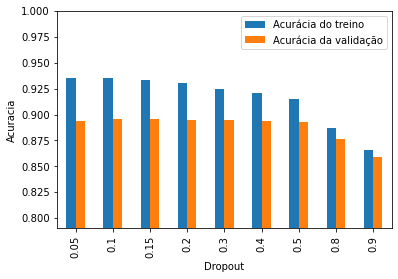

In [33]:
pd.DataFrame(acuracia_dict).T.plot.bar()
plt.xlabel('Dropout')
plt.ylabel('Acuracia')
plt.ylim(0.79, 1.0)
plt.show()

Até 0.5 de dropout na primeira camada houve uma melhora na acuracia do modelo e uma diminuição no sobre ajuste.

## Epochs

In [34]:
epochs_list = [5, 7, 10, 12, 15, 20, 30, 40]
acuracia_dict = dict()

for epochs in epochs_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(400, input_shape = (784,), activation='relu'))
    m.add(keras.layers.Dropout(.5))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 300, epochs = epochs, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[epochs] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/5
160/160 [==============================] - 1s 9ms/step - loss: 0.6830 - accuracy: 0.7627 - val_loss: 0.4675 - val_accuracy: 0.8385
Epoch 2/5
160/160 [==============================] - 1s 8ms/step - loss: 0.4719 - accuracy: 0.8340 - val_loss: 0.4041 - val_accuracy: 0.8562
Epoch 3/5
160/160 [==============================] - 1s 8ms/step - loss: 0.4257 - accuracy: 0.8493 - val_loss: 0.3897 - val_accuracy: 0.8594
Epoch 4/5
160/160 [==============================] - 1s 8ms/step - loss: 0.3996 - accuracy: 0.8553 - val_loss: 0.3591 - val_accuracy: 0.8718
Epoch 5/5
160/160 [==============================] - 1s 8ms/step - loss: 0.3792 - accuracy: 0.8641 - val_loss: 0.3534 - val_accuracy: 0.8732
Epoch 1/7
160/160 [==============================] - 1s 9ms/step - loss: 0.6845 - accuracy: 0.7593 - val_loss: 0.4622 - val_accuracy: 0.8354
Epoch 2/7
160/160 [==============================] - 1s 9ms/step - loss: 0.4725 - accuracy: 0.8358 - val_loss: 0.4010 - val_accuracy: 0.8562
Epoch 3/7
160

Epoch 10/20
160/160 [==============================] - 1s 8ms/step - loss: 0.3282 - accuracy: 0.8800 - val_loss: 0.3227 - val_accuracy: 0.8813
Epoch 11/20
160/160 [==============================] - 1s 8ms/step - loss: 0.3209 - accuracy: 0.8826 - val_loss: 0.3187 - val_accuracy: 0.8854
Epoch 12/20
160/160 [==============================] - 1s 8ms/step - loss: 0.3169 - accuracy: 0.8855 - val_loss: 0.3139 - val_accuracy: 0.8850
Epoch 13/20
160/160 [==============================] - 1s 8ms/step - loss: 0.3094 - accuracy: 0.8865 - val_loss: 0.3111 - val_accuracy: 0.8857
Epoch 14/20
160/160 [==============================] - 1s 8ms/step - loss: 0.3065 - accuracy: 0.8872 - val_loss: 0.3075 - val_accuracy: 0.8889
Epoch 15/20
160/160 [==============================] - 1s 8ms/step - loss: 0.3040 - accuracy: 0.8862 - val_loss: 0.3060 - val_accuracy: 0.8903
Epoch 16/20
160/160 [==============================] - 1s 8ms/step - loss: 0.2962 - accuracy: 0.8909 - val_loss: 0.3019 - val_accuracy: 0.8888

160/160 [==============================] - 1s 8ms/step - loss: 0.2878 - accuracy: 0.8928 - val_loss: 0.3003 - val_accuracy: 0.8923
Epoch 18/40
160/160 [==============================] - 1s 8ms/step - loss: 0.2866 - accuracy: 0.8951 - val_loss: 0.3021 - val_accuracy: 0.8890
Epoch 19/40
160/160 [==============================] - 1s 9ms/step - loss: 0.2833 - accuracy: 0.8948 - val_loss: 0.2967 - val_accuracy: 0.8925
Epoch 20/40
160/160 [==============================] - 1s 8ms/step - loss: 0.2757 - accuracy: 0.8986 - val_loss: 0.2962 - val_accuracy: 0.8912
Epoch 21/40
160/160 [==============================] - 1s 9ms/step - loss: 0.2715 - accuracy: 0.8994 - val_loss: 0.2965 - val_accuracy: 0.8916
Epoch 22/40
160/160 [==============================] - 1s 8ms/step - loss: 0.2701 - accuracy: 0.8996 - val_loss: 0.2949 - val_accuracy: 0.8934
Epoch 23/40
160/160 [==============================] - 1s 8ms/step - loss: 0.2665 - accuracy: 0.9011 - val_loss: 0.2909 - val_accuracy: 0.8956
Epoch 24/40

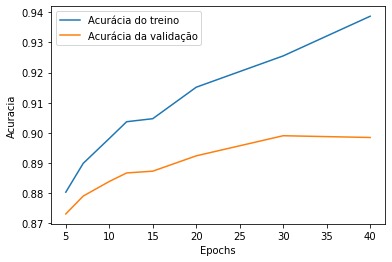

In [35]:
pd.DataFrame(acuracia_dict).T.plot()
plt.xlabel('Epochs')
plt.ylabel('Acuracia')
plt.show()

Após 30 Epochs o sobre ajuste aumenta significativamente porem o modelo parece ter estabilizado na capacidade de predição

O Keras possibilitou resultados melhores que MLPClassifier do sktlearn. Possibilitando que os modelos convergissem mais rápido e resultados mais precisos.